In [1]:
! pip show numpy
! pip show scipy

Name: numpy
Version: 1.15.1
Summary: NumPy: array processing for numbers, strings, records, and objects.
Home-page: http://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages
Requires: 
Required-by: xgboost, tf-nightly-2.0-preview, tensorflowjs, tensorflow, tensorflow-hub, tensorboard, tb-nightly, statsmodels, scipy, patsy, pandas, opt-einsum, moviepy, matplotlib, Keras, Keras-Preprocessing, Keras-Applications, imageio, h5py, gensim
Name: scipy
Version: 1.3.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages
Requires: numpy
Required-by: xgboost, statsmodels, Keras, gensim


In [2]:
import numpy as np

def load_csv_to_ndarray(filepath):
    # Read using numpy lib and return all rows, no header in this case
    return np.genfromtxt(filepath, dtype=float, delimiter=',')

def transform_feature(one_dim_feature_vector):
    transformed_feature_vector = np.zeros((len(one_dim_feature_vector), 2*128))

    for i in range(0, len(one_dim_feature_vector)):
        feature = one_dim_feature_vector[i]
        transformed_feature = np.zeros(2*128)

        for j in range(0, 128):
            transformed_feature[2*j] = np.cos((j+1) * feature)

            transformed_feature[(2*j)+1] = np.sin((j+1) * feature)

        transformed_feature_vector[i] = transformed_feature

    return transformed_feature_vector

# Use np.linalg.lstsq to compute the minimum Euclidean norm solution
def compute_min_euclidean_norm_solution(feature_matrix, label_vector):
    # Get X'
    feature_matrix_transposed = feature_matrix.T

    # Compute X'X (covariance matrix)
    feature_matrix_matmul = np.dot(feature_matrix_transposed, feature_matrix)

    # Basically, lstsq(M_1, M_2) will return a solution, let say M_sol
    # M_sol has the least squares or l2 norms amongst other solutions (there can also be no solution)
    # M_sol fulfills the equation: np.dot(M_1, M_sol) = M_2
    # In our case, M_1 would be X'X, M_2 would be X'y and M_sol would be the weights we seek
    return np.linalg.lstsq(feature_matrix_matmul, np.dot(feature_matrix_transposed, label_vector), rcond=None)[0]

def create_weights_diagonal_matrix(squared=False):
    weights = np.zeros(2*128)

    for j in range(0, 128):
        weights[2*j] = np.ceil((j+1)/2)
        if squared:
            weights[2*j] = weights[2*j] ** 2

        weights[(2*j)+1] = np.ceil((j+1)/2)
        if squared:
            weights[(2*j)+1] = weights[(2*j)+1] ** 2

    return weights, np.diag(weights)

def run_experiment_1a():
    train_df = load_csv_to_ndarray('hw3p1_train.csv')
    test_df = load_csv_to_ndarray('hw3p1_test.csv')

    one_dim_feature_vector = train_df[:,0]
    label_vector = train_df[:,1]

    feature_matrix = transform_feature(one_dim_feature_vector)

    sol = compute_min_euclidean_norm_solution(feature_matrix, label_vector)

    test_feature_matrix = transform_feature(test_df)
    test_pred_result = np.dot(test_feature_matrix, sol)
    
    print('ERROR: ')
    print(np.dot(feature_matrix, sol) - label_vector)

    # By default, Mac OS X can't directly render matplotlib
    # To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    
    plt.title('Minimum Euclidean Plot')
    plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')
    
    plt.savefig('1a.png', bbox_inches='tight')
    
    plt.show()

def run_experiment_1b():
    train_df = load_csv_to_ndarray('hw3p1_train.csv')
    test_df = load_csv_to_ndarray('hw3p1_test.csv')

    one_dim_feature_vector = train_df[:,0]
    label_vector = train_df[:,1]

    feature_matrix = transform_feature(one_dim_feature_vector)

    _, weights_diagonal_matrix = create_weights_diagonal_matrix()

    # Stack feature_matrix with weights_diagonal
    weighted_feature_matrix = np.vstack((feature_matrix, weights_diagonal_matrix))

    # Pad label_vector with zeros
    padded_label_vector = np.zeros(2*128 + len(label_vector))
    padded_label_vector[0:len(label_vector)] = label_vector

    sol = compute_min_euclidean_norm_solution(weighted_feature_matrix, padded_label_vector)

    test_feature_matrix = transform_feature(test_df)
    test_pred_result = np.dot(test_feature_matrix, sol)
    
    print('ERROR: ')
    print(np.dot(feature_matrix, sol) - label_vector)

    # By default, Mac OS X can't directly render matplotlib
    # To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    
    plt.title('Minimum Weighted Euclidean Plot')
    plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')
    
    plt.savefig('1b.png', bbox_inches='tight')
    
    plt.show()

In [3]:
run_experiment_1a()

ERROR: 
[-2.02615702e-15 -3.55271368e-15  1.33226763e-15 -1.11022302e-16
 -2.33146835e-15  2.66453526e-15  5.55111512e-16 -6.10622664e-16
 -5.32907052e-15 -4.88498131e-15  5.32907052e-15  4.44089210e-16
 -1.05471187e-15  1.66533454e-16  4.44089210e-16 -1.11022302e-15
 -1.94289029e-15 -1.77635684e-15 -6.66133815e-16 -2.88657986e-15
  1.74860126e-15 -4.44089210e-16  1.37390099e-15 -2.22044605e-16
 -9.29811783e-16 -8.88178420e-16  1.31838984e-15 -1.11022302e-15
 -4.99600361e-16  6.66133815e-16  2.22044605e-16 -1.99840144e-15]


<Figure size 1000x1000 with 1 Axes>

ERROR: 
[-0.21446767 -1.0029611   1.3066666  -0.5565023  -0.19277294  0.48519983
  0.16357536  0.42608296 -1.00878131 -0.61722473  1.45082296 -1.18894001
  0.18868128  0.26110158 -0.20246542  0.23954608  0.27868055 -0.30719998
 -0.19715184 -0.26470466 -0.13239285  0.74827121 -0.14843482 -0.4722137
  0.33160853 -0.17317977 -0.10262321  0.27136428 -0.13801537  0.35423028
 -0.51149098  0.68714138]


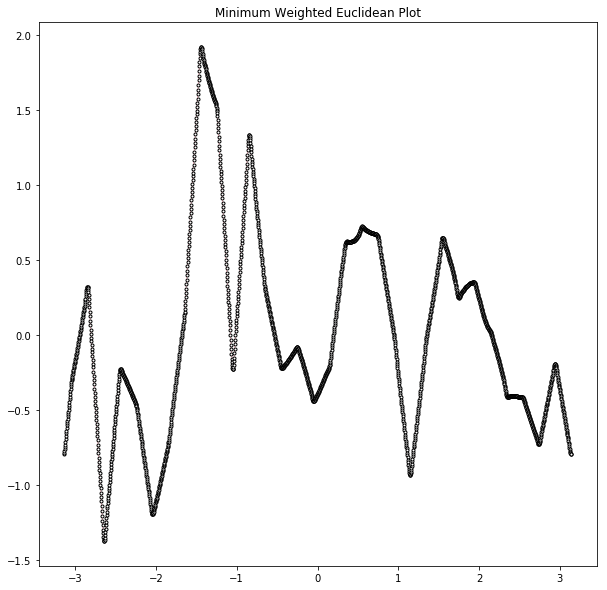

In [4]:
run_experiment_1b()

ERROR: 
[-7.63278329e-16  2.66453526e-15  3.55271368e-15 -2.22044605e-16
 -2.77555756e-16  1.11022302e-15  6.66133815e-16  1.72084569e-15
  1.77635684e-15  4.88498131e-15  3.77475828e-15 -2.66453526e-15
 -1.60982339e-15 -1.16573418e-15  6.93889390e-17 -1.11022302e-16
 -3.94129174e-15 -2.66453526e-15 -2.55351296e-15 -2.88657986e-15
 -6.93889390e-16  8.88178420e-16 -3.02535774e-15 -4.44089210e-16
  1.99840144e-15  8.88178420e-16  1.55431223e-15  5.55111512e-16
  2.10942375e-15 -1.11022302e-15  5.55111512e-16 -8.88178420e-16]


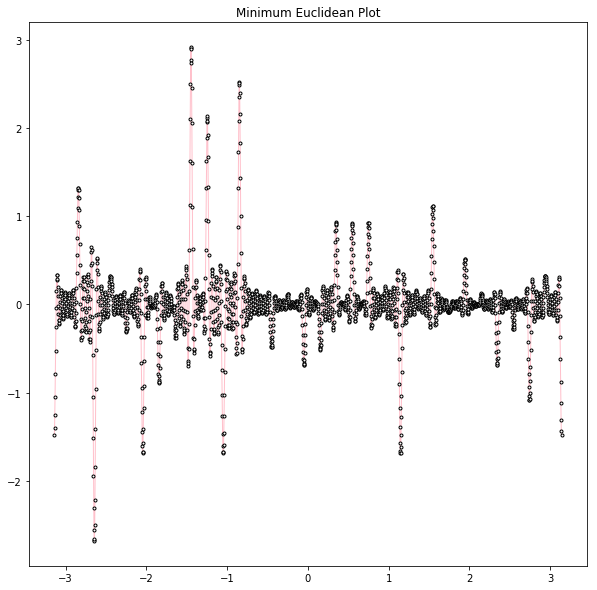

In [5]:
train_df = load_csv_to_ndarray('hw3p1_train.csv')
test_df = load_csv_to_ndarray('hw3p1_test.csv')

one_dim_feature_vector = train_df[:,0]
label_vector = train_df[:,1]

feature_matrix = transform_feature(one_dim_feature_vector)

sol = np.dot(np.linalg.pinv(feature_matrix), label_vector)

test_feature_matrix = transform_feature(test_df)
test_pred_result = np.dot(test_feature_matrix, sol)

print('ERROR: ')
print(np.dot(feature_matrix, sol) - label_vector)

# By default, Mac OS X can't directly render matplotlib
# To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

plt.title('Minimum Euclidean Plot')
plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')

plt.show()

ERROR: 
[-0.21446767 -1.0029611   1.3066666  -0.5565023  -0.19277294  0.48519983
  0.16357536  0.42608296 -1.00878131 -0.61722473  1.45082296 -1.18894001
  0.18868128  0.26110158 -0.20246542  0.23954608  0.27868055 -0.30719998
 -0.19715184 -0.26470466 -0.13239285  0.74827121 -0.14843482 -0.4722137
  0.33160853 -0.17317977 -0.10262321  0.27136428 -0.13801537  0.35423028
 -0.51149098  0.68714138]


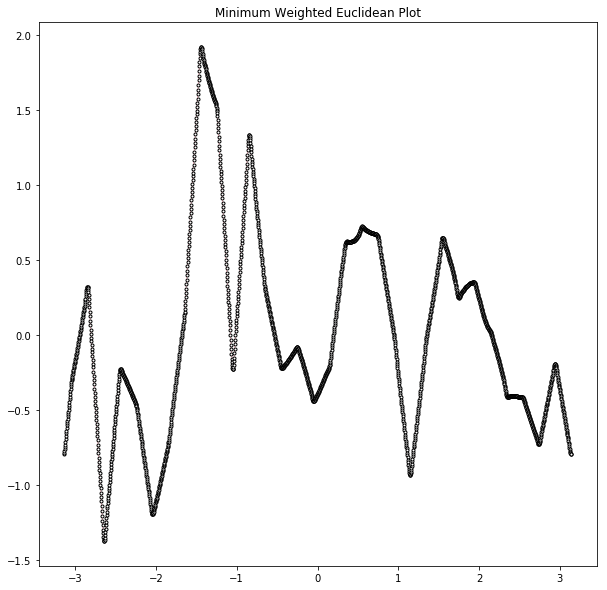

In [6]:
train_df = load_csv_to_ndarray('hw3p1_train.csv')
test_df = load_csv_to_ndarray('hw3p1_test.csv')

one_dim_feature_vector = train_df[:,0]
label_vector = train_df[:,1]

feature_matrix = transform_feature(one_dim_feature_vector)

_, weights_diagonal_matrix = create_weights_diagonal_matrix()

# Stack feature_matrix with weights_diagonal
weighted_feature_matrix = np.vstack((feature_matrix, weights_diagonal_matrix))

# Pad label_vector with zeros
padded_label_vector = np.zeros(2*128 + len(label_vector))
padded_label_vector[0:len(label_vector)] = label_vector

sol = np.dot(np.linalg.pinv(weighted_feature_matrix), padded_label_vector)

test_feature_matrix = transform_feature(test_df)
test_pred_result = np.dot(test_feature_matrix, sol)

print('ERROR: ')
print(np.dot(feature_matrix, sol) - label_vector)

# By default, Mac OS X can't directly render matplotlib
# To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

plt.title('Minimum Weighted Euclidean Plot')
plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')

plt.show()

In [7]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])

In [8]:
res

     con: array([], dtype=float64)
     fun: -21.99999984082497
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.89999997e+01, 8.46872172e-08])
  status: 0
 success: True
       x: array([ 9.99999989, -2.99999999])

In [9]:
train_df = load_csv_to_ndarray('hw3p1_train.csv')
test_df = load_csv_to_ndarray('hw3p1_test.csv')

one_dim_feature_vector = train_df[:,0]
label_vector = train_df[:,1]

feature_matrix = transform_feature(one_dim_feature_vector)

In [10]:
# 256
weights, _ = create_weights_diagonal_matrix()

# 512
appended_weights = np.zeros(2*2*128)

# First 256 is for w, last 256 for v
# Give zero weights to w cause we don't give a shit about sum(w)
# We care about sum(abs(w)), i.e. sum(v)
appended_weights[2*128:2*2*128] = weights 

appended_weights.shape

(512,)

In [11]:
# Equality constraint

# A^tA
A_eq = np.dot(feature_matrix.transpose(), feature_matrix)
# Add 256 more zero columns to fit for v
A_eq = np.hstack((A_eq, np.zeros((2*128, 2*128))))
print(A_eq.shape)
# Label vector stay as is, A^tb will have shape 256
b_eq = np.dot(feature_matrix.transpose(), label_vector)
print(b_eq.shape)

(256, 512)
(256,)


In [12]:
# # Inequality constraint

# first_constraint = np.repeat([1, -1], 2*128) # yield [1 256 times followed by -1 256 times], i.e. w - v <= 0
# print(first_constraint.shape)
# second_constraint = np.repeat([-1], 2*2*128) # yield [-1 512 times], i.e. - w - v <= 0
# print(second_constraint.shape)
# # third_constraint = np.hstack((np.zeros(2*128), np.repeat([-1], 2*128))) # - v <= 0
# # print(third_constraint.shape)

# A_ub = np.zeros((2, 2*2*128))
# A_ub[0] = first_constraint
# A_ub[1] = second_constraint
# # A_ub[2] = third_constraint
# print(A_ub.shape)

# b_ub = np.zeros(2)
# print(b_ub)

# Inequality constraint

# Each pair of v and w needs to follow: - w - v <= 0 and w - v <= 0
A_ub = np.zeros((512, 512))
for i in range(0, int(len(A_ub)/2)):
    # -w_j - v_j
    A_ub[2*i][i] = -1
    A_ub[2*i][i+256] = -1
    
    # w_j - v_j
    A_ub[(2*i)+1][i] = 1
    A_ub[(2*i)+1][i+256] = -1

# Upper bound <= 0
b_ub = np.zeros(512)

In [13]:
# No need to set bound for v, because the default is nonnegative
# Set bound for w from -inf to inf (None, None)
# Set bound for v from 0 to inf (0, None)
bounds = []
for i in range(0, 256):
    bounds.append((None, None))
for i in range(0, 256):
    bounds.append((0, None))

In [14]:
import scipy
# np.hstack(([1,2], [3,4]))
res = scipy.optimize.linprog(appended_weights, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='revised simplex')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/_linprog_util.py:763: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


In [15]:
dantzig_sol = res.x

In [16]:
dantzig_sol_only_w = dantzig_sol[0:256]

In [18]:
dantzig_sol_only_w

array([ 3.88911090e-01, -6.73880758e-02, -2.69890718e-01, -2.35040686e-01,
       -3.37736579e-01,  1.87185127e-01,  1.36138369e-01,  5.83515341e-01,
       -1.72097821e-01, -1.03661967e-02, -3.44544136e-01, -2.25748750e-01,
       -3.59156317e-01, -4.95614404e-03,  4.08285109e-01,  2.55363065e-01,
        4.20272553e-01, -3.20066659e-01, -2.52979733e-01, -2.24638473e-02,
       -2.81710438e-01, -4.50862961e-01, -6.91298760e-01, -1.09037022e-02,
        3.82132633e-01,  4.01764999e-01, -7.41945083e-02,  1.32600797e-02,
        3.52235804e-01,  4.25295967e-02,  1.04083409e-17, -1.02373092e-02,
        2.95821860e-16, -1.61431843e-20, -4.36917643e-16,  1.87404110e-19,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.07483884e-16,  0.00000000e+00,  2.77555756e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.43819045e-17,  0.00000000e+00,
       -1.63865162e-18,  

In [19]:
dantzig_sol[256:512]

array([ 3.88911090e-01,  6.73880758e-02,  2.69890718e-01,  2.35040686e-01,
        3.37736579e-01,  1.87185127e-01,  1.36138369e-01,  5.83515341e-01,
        1.72097821e-01,  1.03661967e-02,  3.44544136e-01,  2.25748750e-01,
        3.59156317e-01,  4.95614404e-03,  4.08285109e-01,  2.55363065e-01,
        4.20272553e-01,  3.20066659e-01,  2.52979733e-01,  2.24638473e-02,
        2.81710438e-01,  4.50862961e-01,  6.91298760e-01,  1.09037022e-02,
        3.82132633e-01,  4.01764999e-01,  7.41945083e-02,  1.32600797e-02,
        3.52235804e-01,  4.25295967e-02,  3.46944695e-18,  1.02373092e-02,
       -1.16922224e-16,  0.00000000e+00,  5.00465376e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.46944695e-18,  0.00000000e+00,
        0.00000000e+00,  

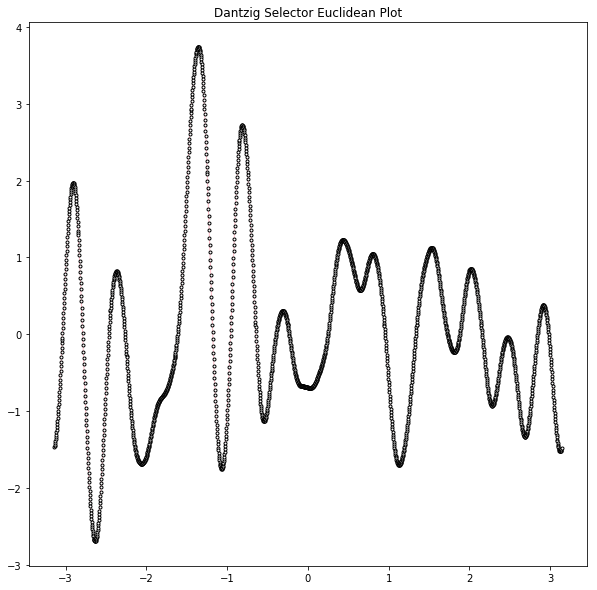

In [20]:
# By default, Mac OS X can't directly render matplotlib
# To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
import matplotlib.pyplot as plt

test_feature_matrix = transform_feature(test_df)
test_pred_result = np.dot(test_feature_matrix, dantzig_sol_only_w)

fig = plt.figure(figsize=(10, 10))

plt.title('Dantzig Selector Euclidean Plot')
plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')

plt.show()